In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv(r"C:\Users\abhin\OneDrive\Documents\Work\BE Exam Prep\LP3 - Pracs\ML\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [45]:
df = df.drop(['CustomerId','Surname','RowNumber'],axis = 1)

In [46]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
geography=pd.get_dummies(df['Geography'],drop_first=True)
df=pd.concat([df,gender,geography],axis=1)
df = df.drop(['Gender','Geography'],axis=1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [48]:
X=df.drop(['Exited'],axis=1)
Y=df['Exited']

In [49]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -1.09598752,
        -0.57873591, -0.57380915],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.09598752,
        -0.57873591,  1.74273971],
       [-1.53679418,  0.29351742,  1.03290776, ..., -1.09598752,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.09598752,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.91241915,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -1.09598752,
        -0.57873591, -0.57380915]], shape=(10000, 11))

In [52]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Male', 'Germany',
       'Spain'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
model = MLPClassifier()

In [57]:
model.fit(x_train,y_train)

C:\Users\abhin\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [58]:
y_pred = model.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report

In [60]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ",cm)

Confusion Matrix :  [[1876  123]
 [ 229  272]]


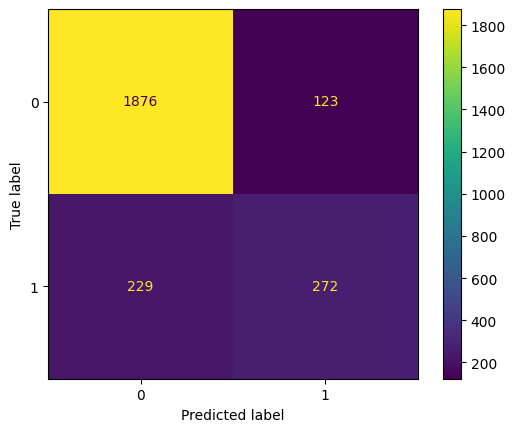

In [62]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [63]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8592


In [65]:
print("Classification Report : \n",classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1999
           1       0.69      0.54      0.61       501

    accuracy                           0.86      2500
   macro avg       0.79      0.74      0.76      2500
weighted avg       0.85      0.86      0.85      2500

